In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import math

In [19]:
donations = pd.DataFrame.from_csv('opendata_donations.csv', index_col=None).ix[:,0:23]
donations = donations.rename(columns=lambda x: x.strip()) # removing whitespaces from columns
donations = donations[(donations.donor_zip!='SC')&(donations.donor_zip!='NY')&(donations.donor_zip!='NJ')&(donations.donor_zip!='TX')]
donations.head(5)

,_donationid,_projectid,_donor_acctid,_cartid,donor_city,donor_state,donor_zip,is_teacher_acct,donation_timestamp,donation_to_project,...,donation_included_optional_support,payment_method,payment_included_acct_credit,payment_included_campaign_gift_card,payment_included_web_purchased_gift_card,payment_was_promo_matched,via_giving_page,for_honoree,thank_you_packet_mailed,donation_message
0,00000ce845c00cbf0686c992fc369df4,7be7184572a67468a2ef4402e7de6c99,01e2385f52c03386ee345c517be8f84e,NaN,NaN,NY,NaN,f,36:26.8,21.25,...,t,promo_code_match,f,f,f,f,f,f,f,Friends and Family matching donation provided ...
1,0000174d1d38072889d47e51b587a10c,fbef21e4fdf303eebe6c48b99ef9de8f,f495e99822acc50e934a57943400bcfe,db07e0db53dfa402c4a2aa02d46583d4,San Francisco,CA,941,f,07:26.1,1817.36,...,t,no_cash_received,t,f,f,f,t,f,f,Chevron is committed to securing California’s ...
2,0000219e4b37d2504fb6b8c28e24a2d4,b4afbc05ce9ff8420c176810bd59db79,d63c0d8e5b76530d476486e3336e1f3c,9bd9e83716ecd6bee6e467e9b82964ab,Ballwin,MO,630,f,29:59.3,40.43,...,t,paypal,f,f,f,f,f,f,f,I donated because the project will bring impor...
3,0000300773fe015f870914b42528541b,f8fac919961560831eac7e5dd05c872d,e0dd67c660dc50ec1b2dadf37f3c65d4,NaN,NaN,NY,100,f,54:57.7,21.25,...,t,promo_code_match,f,f,f,f,t,f,f,Courtesy of an anonymous donor. Best of luck w...
4,000048290a3054197cc33ba82633d7c3,de2f3691169dd3439ee37a78b49296e7,f00a2c100229d370655841ed8341baed,49e3f476b31da5bcd1d077e2c491d1b3,NaN,TN,373,t,58:11.7,0.88,...,t,no_cash_received,t,f,f,f,t,f,f,Good Luck! :)


In [4]:
projects = pd.DataFrame.from_csv('opendata_projects.csv', index_col=None)
projects.head(5)

,_projectid,_teacher_acctid,_schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_zip,school_metro,...,students_reached,total_donations,num_donors,eligible_double_your_impact_match,eligible_almost_home_match,funding_status,date_posted,date_completed,date_thank_you_packet_mailed,date_expiration
0,7342bd01a2a7725ce033a179d22e382d,5c43ef5eac0f5857c266baa1ccfa3d3f,9e72d6f2f1e9367b578b6479aa5852b7,3.600097e+11,40.688454,-73.910432,Brooklyn,NY,11207,urban,...,0,251,1,f,f,completed,2002-09-13 00:00:00,2002-09-23 00:00:00,2003-01-27 00:00:00,2003-12-31 00:00:00
1,b56b502d25666e29550d107bf7e17910,57426949b47700ccf62098e1e9b0220c,4a06a328dd87bd29892d73310052f45f,3.600077e+11,40.770233,-73.950760,New York,NY,10075,NaN,...,0,125,1,f,f,completed,2002-09-16 00:00:00,2002-09-19 00:00:00,2002-12-19 00:00:00,2003-12-31 00:00:00
2,3a88a47f97bd0c9b7c6a745bcd831ce3,7a20087fac86232883537cab45c0a6c9,66d08b506d2f3c30dec9e6fdb03cc279,3.600122e+11,40.729763,-73.816925,Flushing,NY,11367,urban,...,0,2110,1,f,f,completed,2002-09-17 00:00:00,2003-03-17 00:00:00,2004-06-14 00:00:00,2003-12-31 00:00:00
3,0b8a4f8eb1822ab6dd5cd9ffb918ece3,e5d28482308e2007992ae8b358b31bce,9bc7d4d92193a453669b6e2a56128e87,3.600077e+11,40.701778,-74.011840,New York,NY,10004,urban,...,0,1241,1,f,f,completed,2002-09-17 00:00:00,2002-09-17 00:00:00,2003-12-18 00:00:00,2003-12-31 00:00:00
4,45235cb116b3b35cd86d1c3a63961d7d,214d75bd0e6ce3e7085278ddd8f26daa,f7f12dee0009e6f9afa301bcca9d5070,NaN,40.815018,-73.856094,Bronx,NY,10473,urban,...,0,83,1,f,f,completed,2002-09-17 00:00:00,2002-09-17 00:00:00,2004-01-28 00:00:00,2003-12-31 00:00:00


In [5]:
# Join donations and projects data
projects_donations = projects.merge(donations, on='_projectid',how='inner')
projects_donations.head(5)

,_projectid,_teacher_acctid,_schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_zip,school_metro,...,donation_included_optional_support,payment_method,payment_included_acct_credit,payment_included_campaign_gift_card,payment_included_web_purchased_gift_card,payment_was_promo_matched,via_giving_page,for_honoree,thank_you_packet_mailed,donation_message
0,0b8a4f8eb1822ab6dd5cd9ffb918ece3,e5d28482308e2007992ae8b358b31bce,9bc7d4d92193a453669b6e2a56128e87,3.600077e+11,40.701778,-74.011840,New York,NY,10004,urban,...,f,creditcard,f,f,f,f,f,f,t,NaN
1,0b9607c9d3deb8b493653ed4f998fc38,454840ad7f58f2486203f73ee78ea2d5,0fad38af2fb328dd01bd3cef38ed42f2,3.600081e+11,40.809677,-73.939178,New York,NY,10037,urban,...,f,creditcard,f,f,f,f,f,f,t,NaN
2,702ef0896a72c258affa87e67b3462ef,e11a44441e604753223fb83ed1e5ef22,7e6d4e9ce212bbcc7ca208c3779095be,3.600103e+11,40.620422,-74.080750,Staten Island,NY,10304,urban,...,t,creditcard,f,f,f,f,f,t,t,NaN
3,3b5f4ae59d96f719dec6e72f1d10bd28,6504d611038542e638f54899caf35993,9ce97ca91e28b8493e9a911058f7dc24,3.600078e+11,40.791460,-73.970552,New York,NY,10025,urban,...,f,creditcard,f,f,f,f,f,f,t,NaN
4,182f1734c1c6ec13d5544c17cfe838ec,0c2d4535f03991165dc72092840d672b,cabcc3ed826056c3969a8a99c5aeeaf6,3.600085e+11,40.829224,-73.856899,Bronx,NY,10472,urban,...,t,creditcard,f,f,f,f,f,f,t,NaN


In [6]:
len(projects_donations)

1044690

In [7]:
#1) Proportions of state wise donations against state wise projects 
# Creating a n*n empty data frame for each state
states = projects_donations.school_state.drop_duplicates()
df = pd.DataFrame(columns = states)
for state in states:
    df.loc[state] = states

# Filling the data frame
p_g = projects_donations.groupby('school_state')
for state_p,group_p in p_g:
    #print state_p,'--',group_p.donation_total.sum()
    d_g = group_p.groupby('donor_state')
    for state_d,group_d in d_g:
        #print state_d, group_d.donation_total.sum()
        df.loc[state_p,state_d] = 100*(group_d.donation_total.sum())/(group_p.donation_total.sum())

In [8]:
df.fillna(0).head(5)

school_state,NY,DC,NC,AL,CA,IL,SC,LA,TX,MS,...,AE,AP,PR,AA,AS,VI,AB,MP,BC,HH
NY,57.312084,0.423177,0.467615,0.042275,6.159297,1.131537,0.090010,0.130230,0.659701,0.033189,...,0.011472,0.004175,0.009219,0.000628,0.000000,0.001598,0,0.000285,0,0.000000
DC,11.705908,27.263134,0.884130,0.092409,4.606375,1.318978,0.128401,0.146344,1.229623,0.058941,...,0.030983,0.004782,0.000608,0.006075,0.000000,0.000000,0,0.000000,0,0.000000
NC,13.086358,0.510327,39.301208,0.122830,5.556960,3.530659,0.521087,0.199232,1.022019,0.046986,...,0.072954,0.046019,0.002880,0.000000,0.000000,0.000000,0,0.001421,0,0.005011
AL,19.143096,0.837244,0.717636,18.740924,10.113818,2.218990,0.161342,1.520107,1.343597,0.172539,...,0.006179,0.018909,0.000756,0.000000,0.000000,0.000000,0,0.000000,0,0.000000
CA,9.406766,0.341730,0.187463,0.022484,58.418557,0.833051,0.048583,0.038956,0.589728,0.010537,...,0.009489,0.008216,0.003581,0.000496,0.000247,0.005309,0,0.000000,0,0.000000


In [9]:
df[df.index == 'DC'].sum().sort_values(ascending=False).head(5)

school_state
DC    27.263134
NY    11.705908
VA     9.365090
MD     7.012761
CA     4.606375
dtype: float64

In [10]:
# Identify donations that came from the teacher who created the project
# and assigning donor category
pds = projects_donations
pds.loc[:, 'donor_category'] = 'donor_other'
pds.loc[pds._teacher_acctid == pds._donor_acctid, 'donor_category'] = 'donor_teacher_project'
pds.loc[(pds._teacher_acctid != pds._donor_acctid) & (pds.is_teacher_acct == 't'), 'donor_category'] = 'donor_teacher_other'

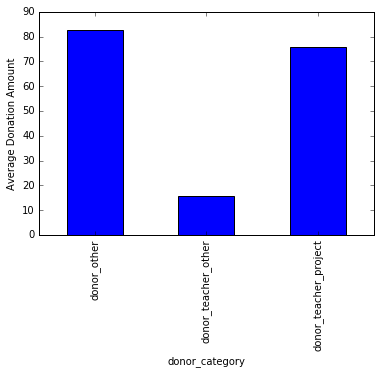

In [21]:
pds_g = pds.groupby(by='donor_category')
pds_g = pds_g['donation_total'].mean()
pds_gx = pds_g.plot(kind='bar')
pds_gx.set_ylabel("Average Donation Amount")

In [12]:
subjects = pds.primary_focus_subject.drop_duplicates()
df = pd.DataFrame(columns = ['Subjects','donor_teacher_project','donor_teacher_other','donor_other'])
df['Subjects'] = subjects
df = df.set_index('Subjects')

# Filling the data frame
pds1 = pds.groupby('primary_focus_subject')
for sub,group_s in pds1:
    pds2 = group_s.groupby('donor_category')
    for dc,group_dc in pds2:
        df.loc[sub,dc] = 100*(group_dc.donation_total.sum())/(group_s.donation_total.sum())
df

,donor_teacher_project,donor_teacher_other,donor_other
Subjects,,,
Economics,4.29982,0.849197,94.851
Environmental Science,14.1833,1.29238,84.5244
History & Geography,5.07593,1.80653,93.1175
Literacy,4.87032,1.61316,93.5165
Music,5.32865,1.92713,92.7442
Literature & Writing,5.12197,1.56572,93.3123
Other,8.57331,1.64846,89.7782
Visual Arts,5.11313,1.38466,93.5022
Extracurricular,4.32559,2.58644,93.088


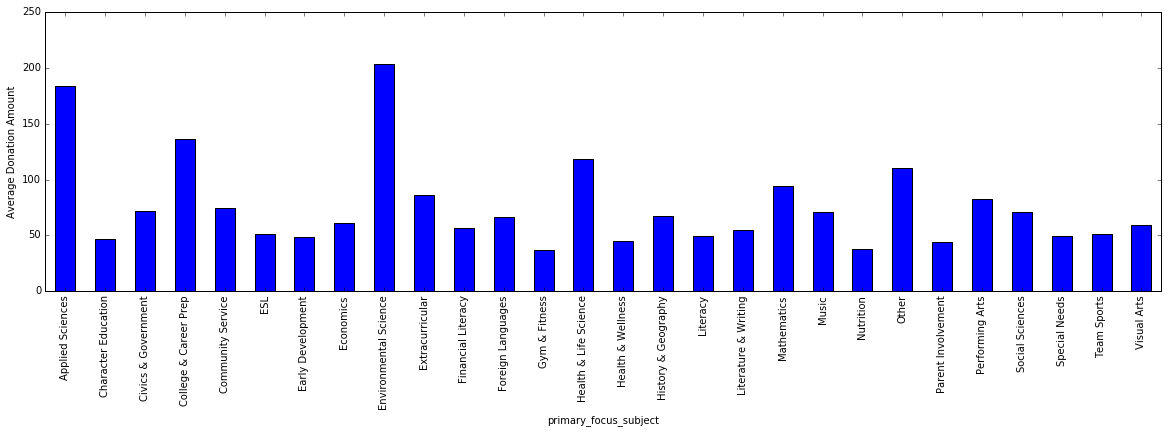

In [22]:
a = pds[pds.donor_category == 'donor_teacher_project']
#a = a[(100 * a.donation_total / a.total_donations) > 33]
ax = a.groupby(by='primary_focus_subject')['donation_total'].mean().plot(kind='bar',figsize=(20,5))
ax.set_ylabel('Average Donation Amount')

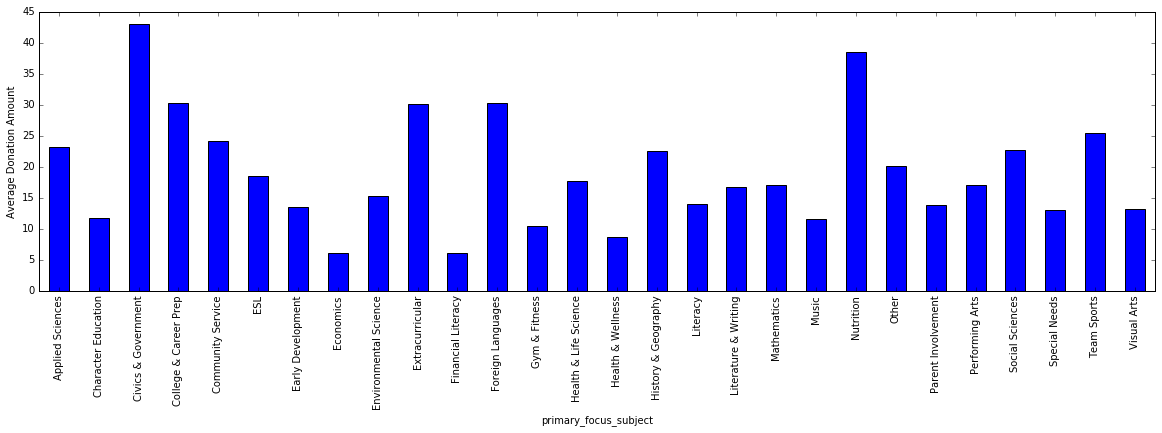

In [23]:
b = pds[pds.donor_category == 'donor_teacher_other']
#a = a[(100 * a.donation_total / a.total_donations) > 33]
bx = b.groupby(by='primary_focus_subject')['donation_total'].mean().plot(kind='bar',figsize=(20,5))
bx.set_ylabel('Average Donation Amount')

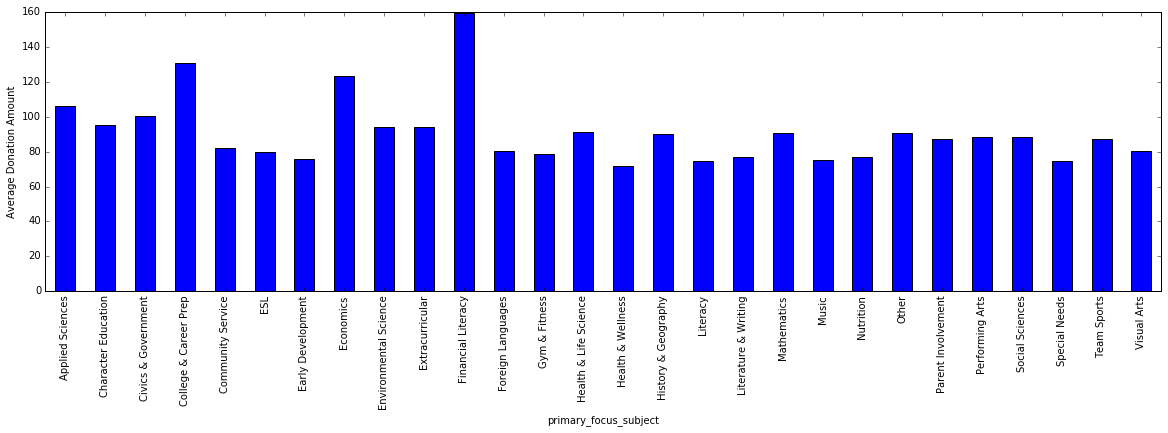

In [24]:
c = pds[pds.donor_category == 'donor_other']
#a = a[(100 * a.donation_total / a.total_donations) > 33]
cx = c.groupby(by='primary_focus_subject')['donation_total'].mean().plot(kind='bar',figsize=(20,5))
cx.set_ylabel('Average Donation Amount')

In [16]:
p = pds[pds.funding_status != 'live'] # Considering only completed projects
p.loc[:,'date_completed'] = pd.to_datetime(p['date_completed'])
p.loc[:,'date_posted'] = pd.to_datetime(p['date_posted'])
p.loc[:,'date_expiration'] = pd.to_datetime(p['date_expiration'])
p1 = p.groupby(by='donor_category')
p2 = p[p.funding_status == 'completed']
p2.loc[:,'project_duration'] = p2['date_completed'] - p2['date_posted']
p2.loc[:,'project_expire_duration'] = p2['date_expiration'] - p2['date_posted']
p2.loc[:,'project_duration_days'] = p2['project_duration'].astype('timedelta64[D]')
p2.loc[:,'project_expire_duration_days'] = p2['project_expire_duration'].astype('timedelta64[D]')
p2 = p2[(p2.project_duration_days < p2.project_expire_duration_days) & (p2.project_duration_days < 200)]
p3 = p2.groupby(by='donor_category')
a = 100*p3.size()/p1.size()
b = p3['project_duration_days'].mean()

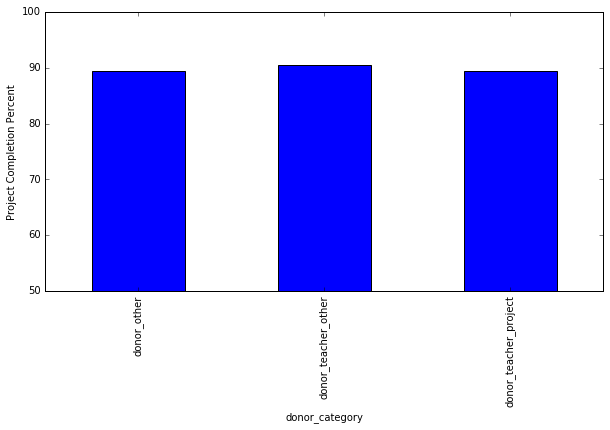

In [17]:
#a.plot(kind='bar')
ax = a.plot(kind='bar',figsize=(10,5),ylim=(50,100))
ax.set_ylabel("Project Completion Percent")

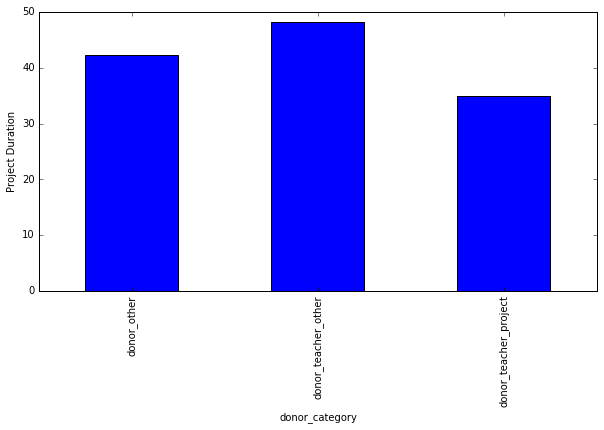

In [18]:
bx = b.plot(kind='bar',figsize=(10,5))
bx.set_ylabel("Project Duration")

Projects that involve own teacher would more likely be completed early than other projects